In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Abdur rahim nishad\Downloads\Mall_Customers (1).csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df=df.rename(columns={"Annual Income (k$)":"income","Spending Score (1-100)":"score"})

In [7]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df=df.drop(["CustomerID"],axis=1)

In [9]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


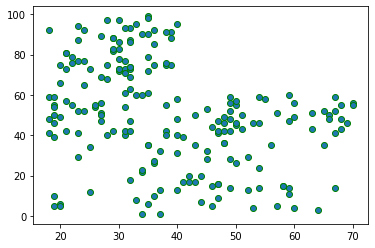

In [11]:
plt.scatter(df.Age,df.score,edgecolors ="g",)

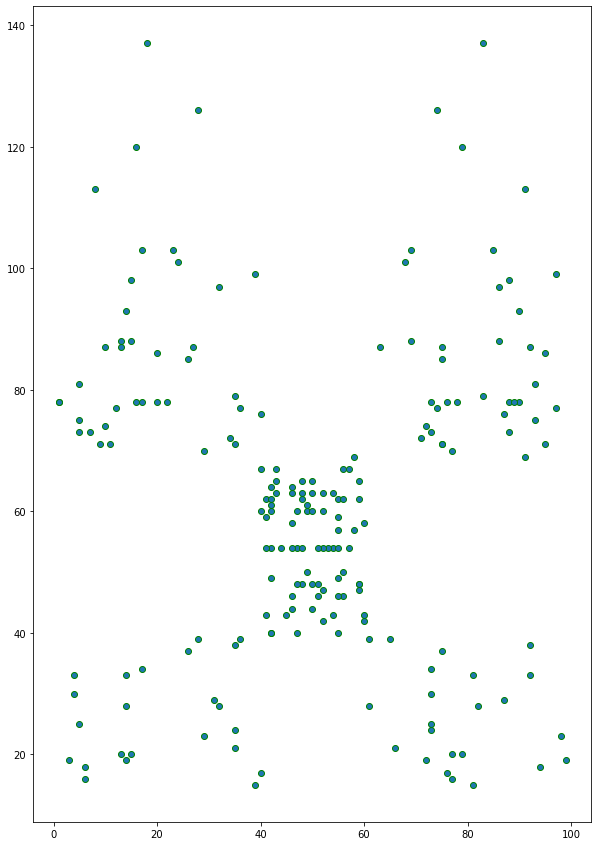

In [12]:
plt.figure(figsize=(10,15))
plt.scatter(df.score,df.income,edgecolors ="g",)

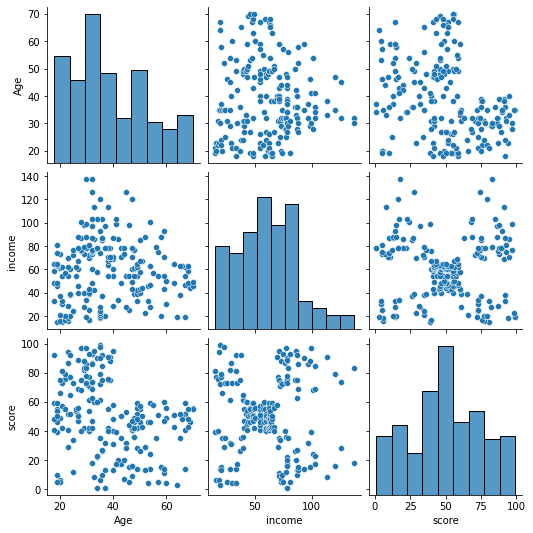

In [13]:
sns.pairplot(df[["Age","income","score"]])

In [14]:
import sklearn.cluster as cluster

In [15]:
cluster= cluster.KMeans(n_clusters=5)

In [16]:
predict=cluster.fit_predict(df[["score","income"]])

In [17]:
predict

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [18]:
df["Cluster_Number"]=predict

In [19]:
df.head()

,Gender,Age,income,score,Cluster_Number
0,Male,19,15,39,4
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,1
4,Female,31,17,40,4


In [20]:
cluster.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783]])

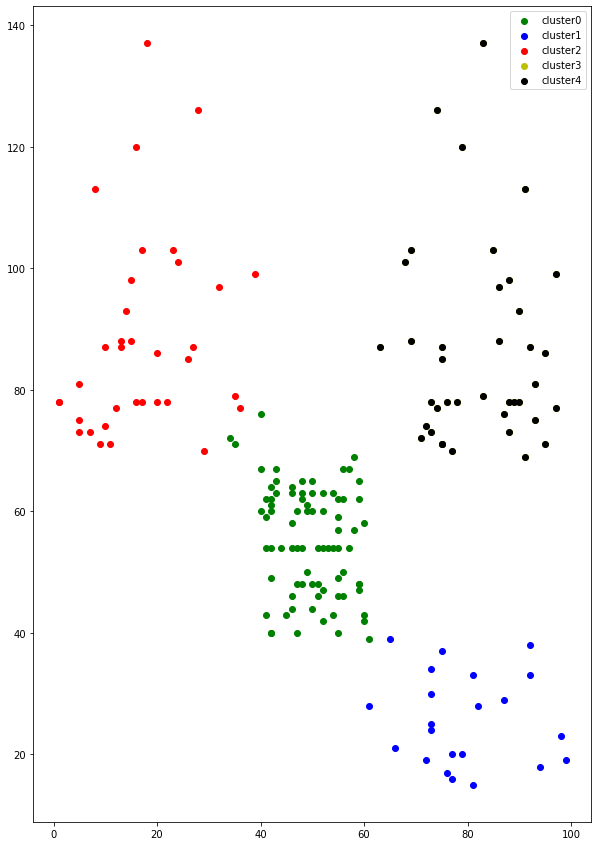

In [21]:
df0=df[df["Cluster_Number"]==0]
df1=df[df["Cluster_Number"]==1]
df2=df[df["Cluster_Number"]==2]
df3=df[df["Cluster_Number"]==3]
df4=df[df["Cluster_Number"]==4]
plt.figure(figsize=(10,15))
plt.scatter(df0["score"],df0["income"],color="g",label="cluster0")
plt.scatter(df1["score"],df1["income"],color="b",label="cluster1")
plt.scatter(df2["score"],df2["income"],color="r",label="cluster2")
plt.scatter(df3["score"],df3["income"],color="y",label="cluster3")
plt.scatter(df3["score"],df3["income"],color="black",label="cluster4")
plt.legend(loc='upper right')